### Feature Extraction and Price Prediction for Mobile Phones 

#### For Feature Extraction Purpose we need to import necessary libraries like PANDAS, NUMPY, SEABORN, MATPLOTLIB & SkLearn
* Pandas : Helps to load the dataset, perform different function like Cleaning, filtering & merging
* Numpy : Used for different functionality in one and multidimensional array objects
* Seaborn : Seaborn is the powerful library that help to create different plots in Python
* Matplotlib : Matplotlib is the library that used to make plot more effective with the help of graphics
* SkLearn : Provide the differetn model and so many inbuilt formula which makes easy to perform processing

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

## 1. Loading the Dataset

#### For Price Prediction, we are using the Mobile Phone details

In [18]:
df = pd.read_csv('Processed_Flipdata.csv')
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


## 2. Data Preprocessing

#### Before using raw data we need to preprocess the data for better results
==> Remove unnecessary characters & spaces from data 
==> Convert the data type that is necessary
==> Fill Missing values with Median

In [19]:
# Clean price column
df['Prize'] = df['Prize'].astype(str).str.replace(",", "").astype(float)

# Convert camera features
for col in ['Rear Camera', 'Front Camera']:
    df['Rear Camera'] = df['Rear Camera'].astype(str).str.replace('MP', '').astype(float)
    df['Front Camera'] = df['Front Camera'].astype(str).str.replace('MP', '').astype(float)

# Fill missing camera values with median
df['Rear Camera'].fillna(df['Rear Camera'].median(), inplace=True)
df['Front Camera'].fillna(df['Front Camera'].median(), inplace=True)

# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    float64
 7   Front Camera   541 non-null    float64
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.8+ KB
None
       Unnamed: 0      Memory         RAM     Battery_  Rear Camera  \
count  541.000000  541.000000  541.000000   541.000000   541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    46.110906  

C:\Users\Dimple\AppData\Local\Temp\ipykernel_4724\507305098.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rear Camera'].fillna(df['Rear Camera'].median(), inplace=True)
C:\Users\Dimple\AppData\Local\Temp\ipykernel_4724\507305098.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

#### Outlier Detection of the data, Visualization the Outliers with the help of BOX PLOT

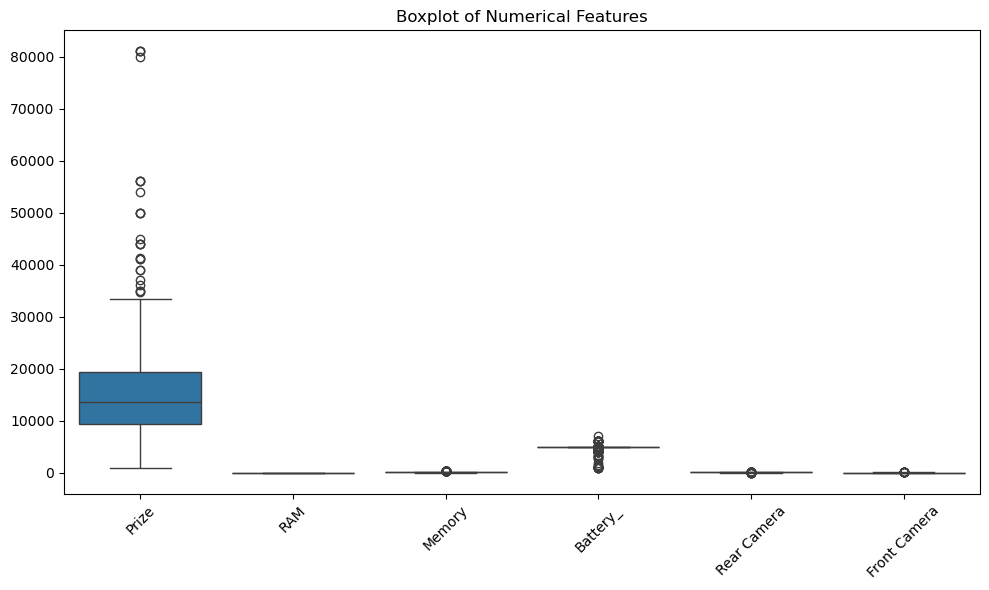

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Prize', 'RAM', 'Memory', 'Battery_', 'Rear Camera', 'Front Camera']])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Convert categorical variables (e.g., model, colour, Processor) into a suitable numerical format, such as one-hot encoding

In [24]:
# One-Hot Encoding
categorical_cols = ['Colour', 'Processor_']
numerical_cols = X.drop(columns=categorical_cols).columns.tolist()

## 3. Feature Extraction

#### Perform feature extraction to identify the most relevant features that strongly affect the price of mobile phones

In [22]:
# Features and target
X = df.drop(columns=['Prize', 'Model'])
y = df['Prize']

# Column Transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

## 4. Model Building

#### Split the dataset into training and testing sets
#### A. Linear Regression
#### B. Gradient Boosting Regressor
#### C. XGBoost

In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

## 5. Model Evaluation

#### Evaluate the model's performance using appropriate metrics to assess how accurately it predicts mobile phone prices
==> e.g., mean absolute error, root mean squared error

In [27]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Linear Regression - MAE: 4118.17, RMSE: 8170.51
Gradient Boosting - MAE: 2280.54, RMSE: 5108.73
XGBoost - MAE: 1790.53, RMSE: 4427.37


## 6. Feature Importance Analysis

#### Analyze the feature importances obtained from model to confirm the significance of the features identified during the feature extraction phase

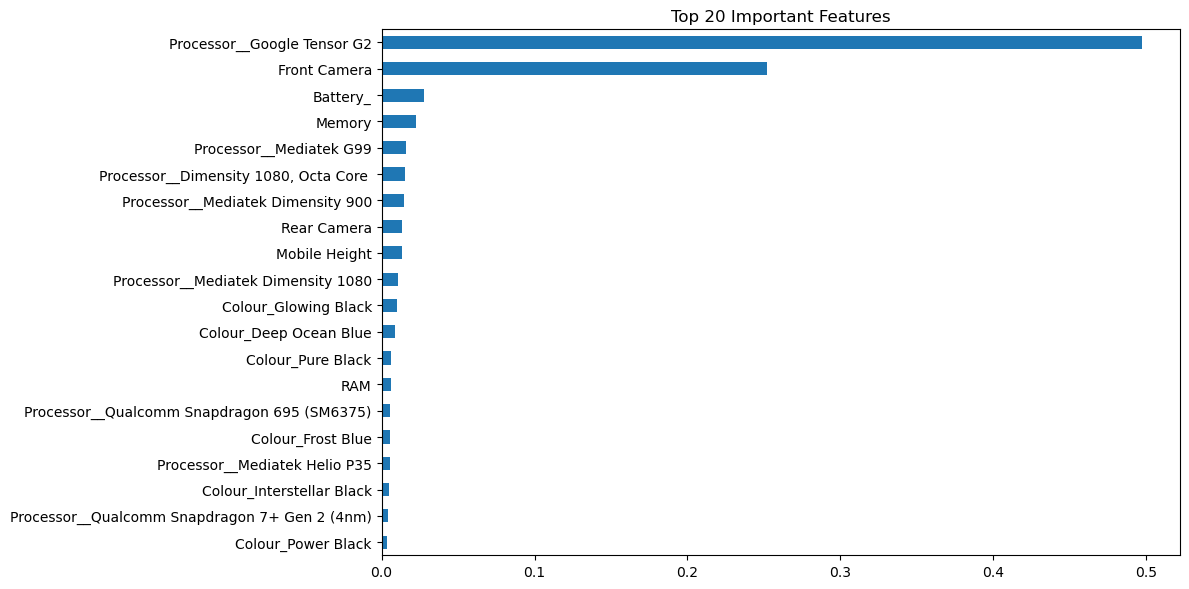

In [28]:
# Fit best model
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])
best_model.fit(X_train, y_train)

# Get feature importances
model = best_model.named_steps['model']
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
importances = model.feature_importances_

# Plot
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
feat_imp.head(20).plot(kind='barh')
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Comparison : Actual vs Predicted

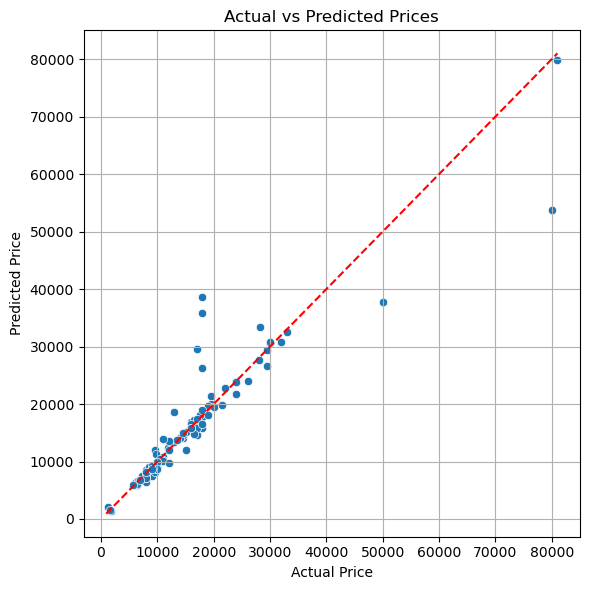

In [29]:
y_pred = best_model.predict(X_test)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Recommendations :

Based on the feature importance analysis, the following features most influence mobile phone prices:

1. RAM
2. Internal Memory
3. Rear Camera
4. Processor
5. Front Camera
6. Battery
7. Screen Height
8. Suggestions:

==> Phones with higher RAM and internal storage command higher prices.

==> Processor brand and type is a strong differentiator — premium processors like Snapdragon 695 increase value.

==> Camera quality, both front and rear, significantly affects price.

==> Battery size shows a moderate correlation with pricing.